<a href="https://colab.research.google.com/github/soundariyae/sustainable-farming-crop-yield-pred/blob/main/crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Load Data

In [5]:
# load the data
df = pd.read_csv('yield_df.csv')

In [6]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# Data PreProcessing

In [7]:
# Data preprocessing
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [9]:
# check for nulls
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [10]:
# check for duplicates
df.duplicated().sum()

np.int64(2310)

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(25932, 7)

In [14]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


### Correlation

Correlation is a statistical measure that describes the extent to which two or more variables change together, showing the strength and direction of a linear relationship between them. A correlation coefficient, typically between \(-1\) and \(+1\), quantifies this relationship: a value close to \(+1\) indicates a strong positive correlation (both variables increase together), a value close to \(-1\) indicates a strong negative correlation (one variable increases as the other decreases), and a value close to \(0\) indicates a weak or no linear correlation. Correlation is crucial for tasks like feature selection, where it helps identify and remove redundant or irrelevant features to simplify models and improve performance.

In [15]:
df.drop(columns=['Area', 'Item']).corr()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


### Data Visualization

In [16]:
len(df['Area'].unique())

101

In [17]:
len(df['Item'].unique())

10

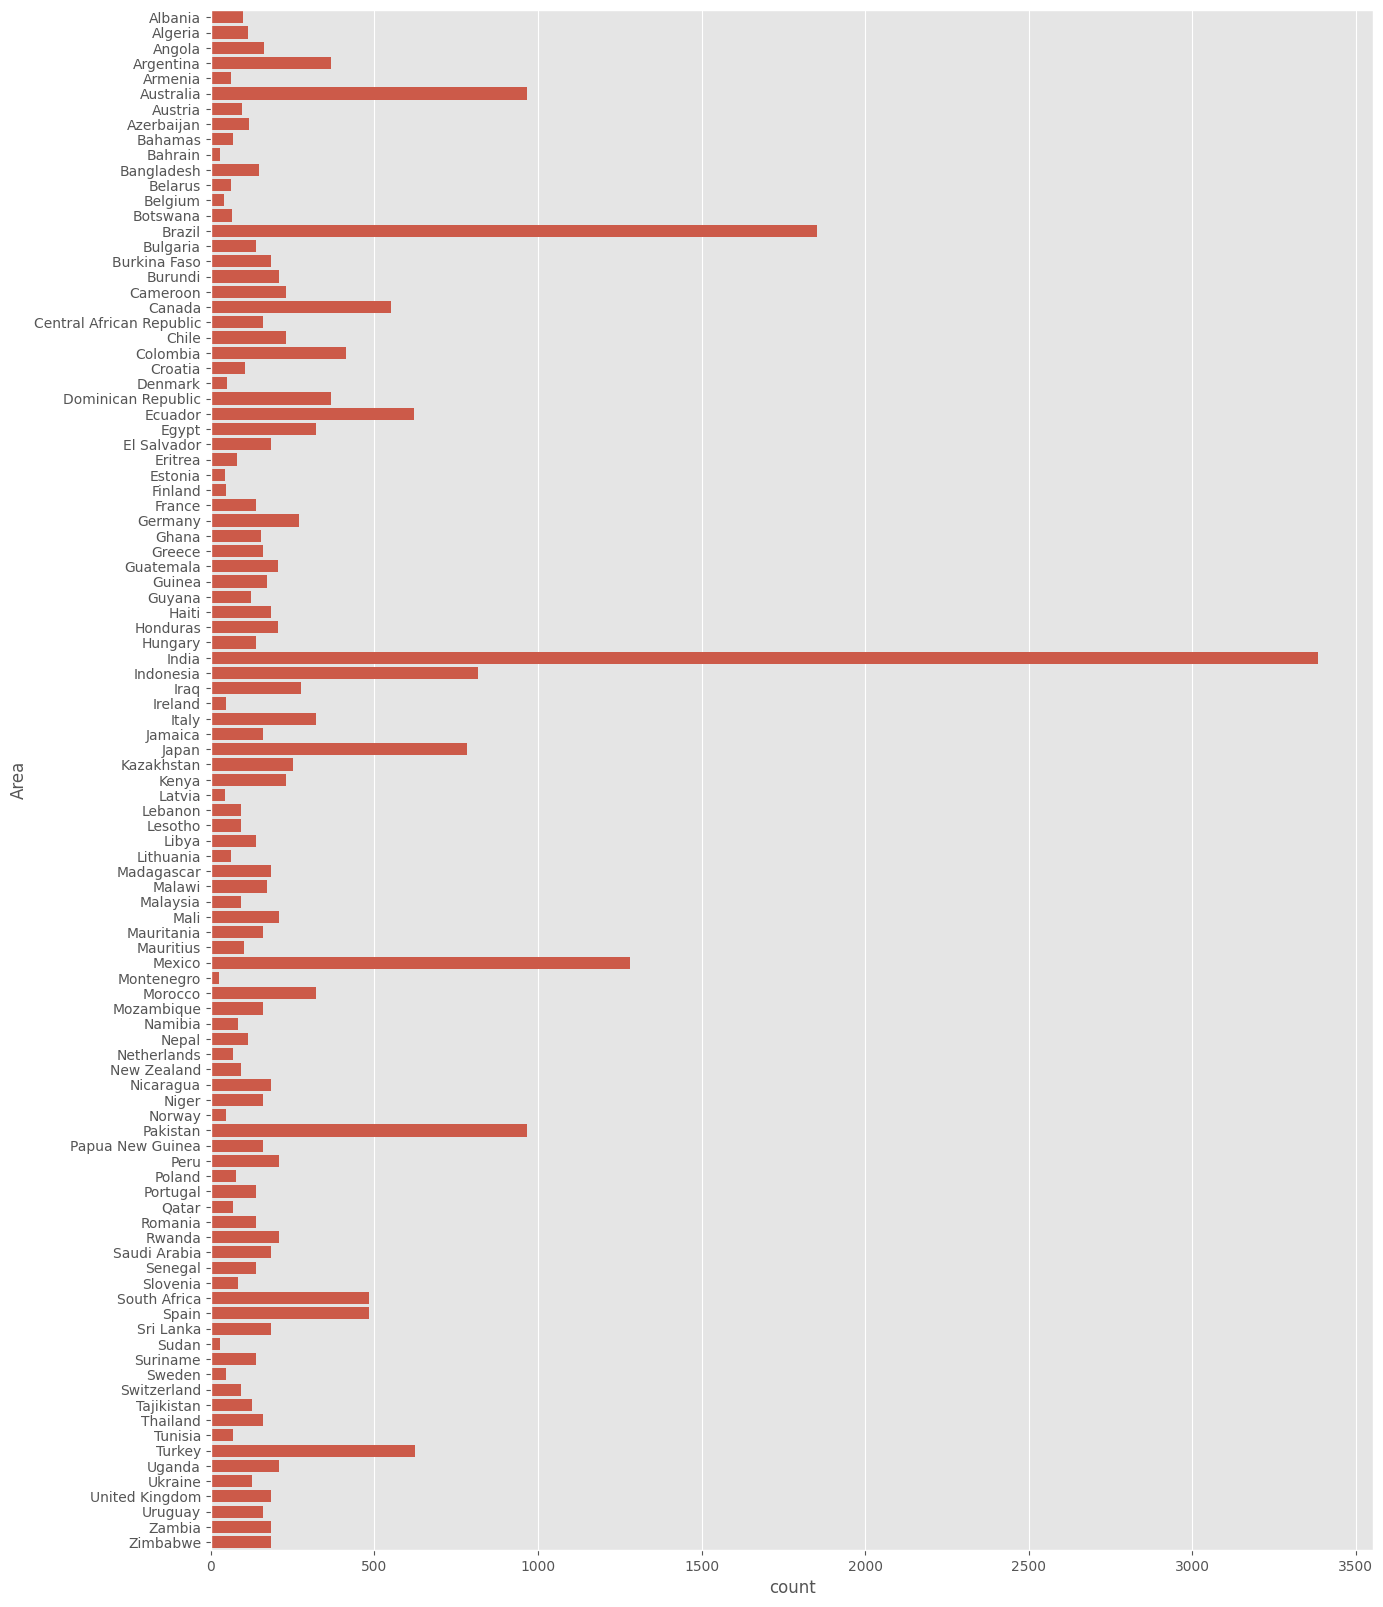

In [18]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

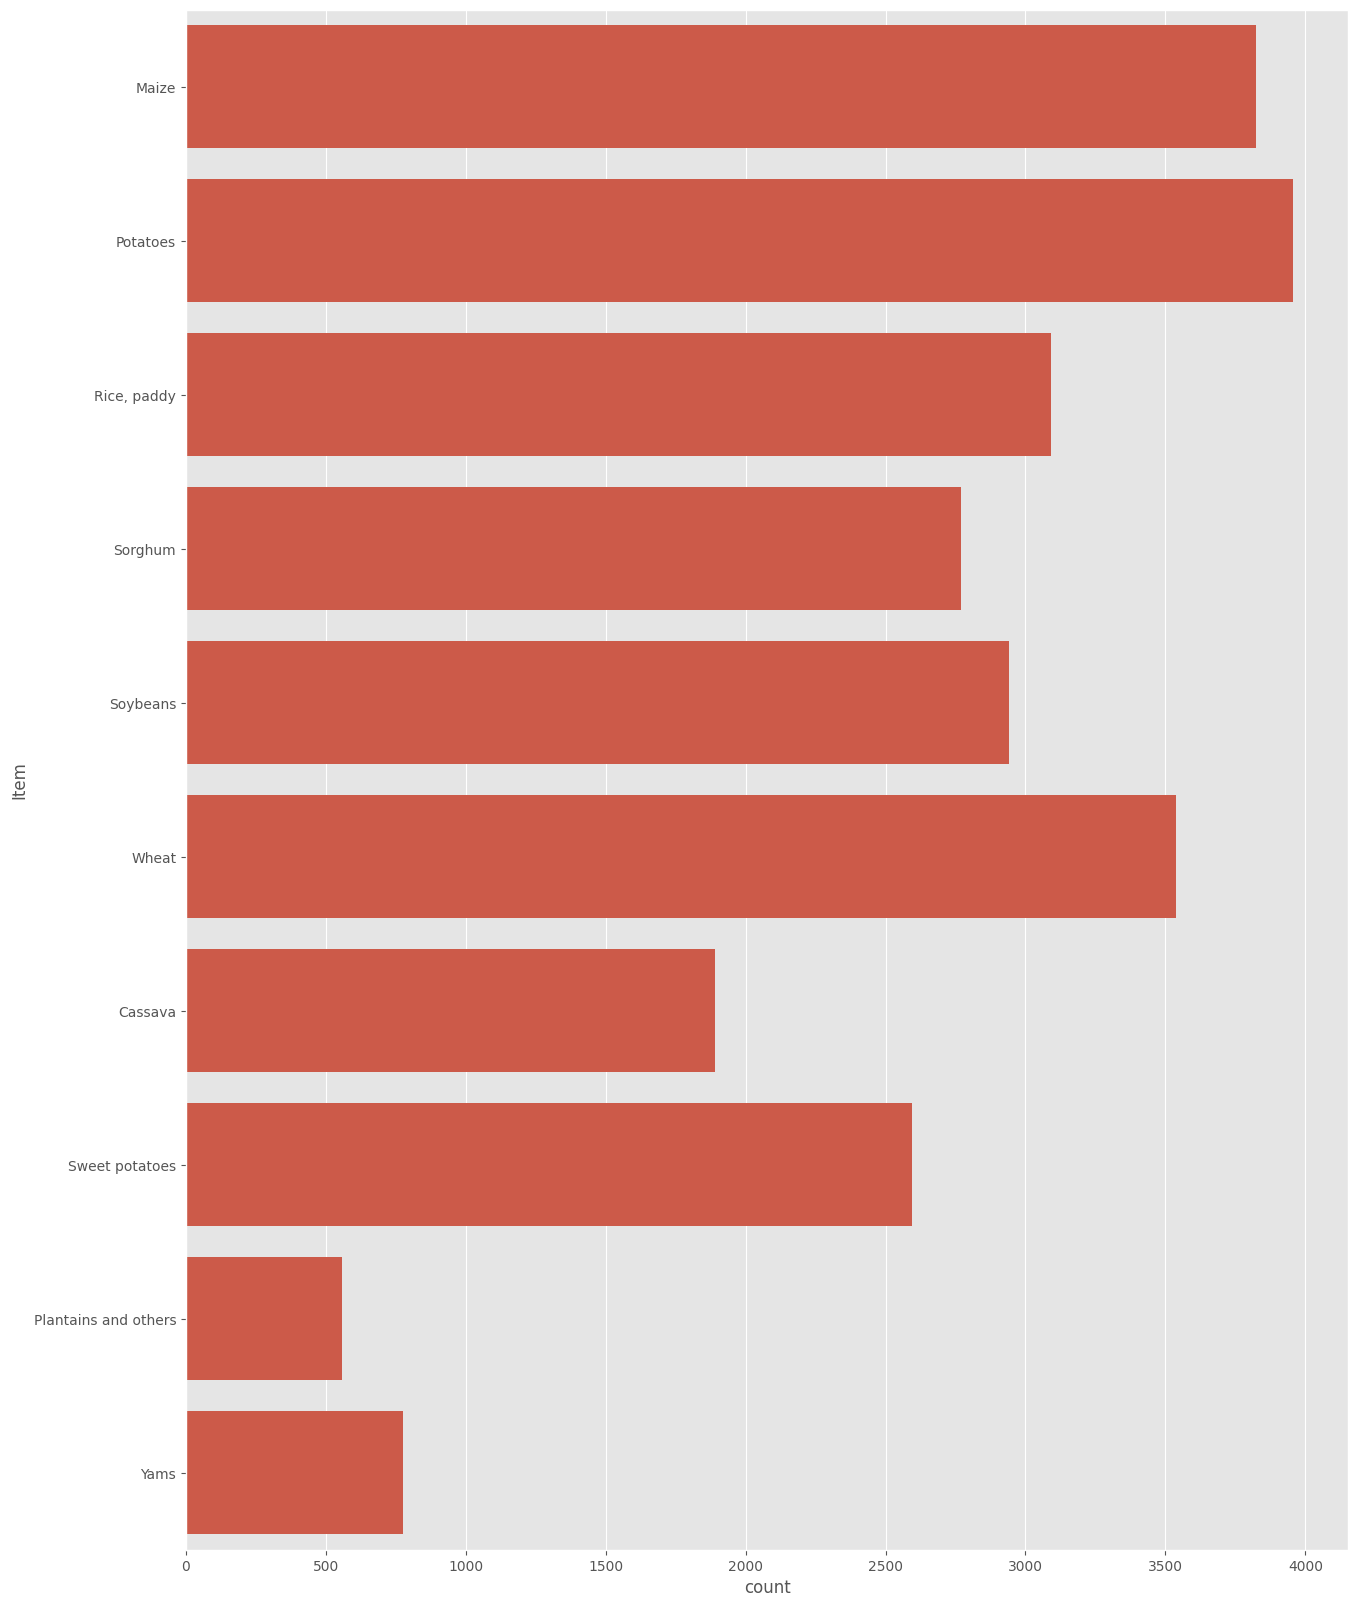

In [19]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Item'])
plt.show()

In [20]:
(df['Area'].value_counts() < 400).sum()

np.int64(88)

### Find yield per country

In [21]:
# find yield per country
country = df['Area'].unique()
yield_per_country = []
for state in country:
  yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())


In [22]:
df['hg/ha_yield'].sum()

np.int64(1996196943)

In [23]:
yield_per_country

[np.int64(5711536),
 np.int64(6711464),
 np.int64(5722563),
 np.int64(32864032),
 np.int64(4524100),
 np.int64(109111062),
 np.int64(10852258),
 np.int64(4608380),
 np.int64(4384717),
 np.int64(4443889),
 np.int64(7720159),
 np.int64(4704812),
 np.int64(8442270),
 np.int64(470651),
 np.int64(136340329),
 np.int64(6263075),
 np.int64(6083337),
 np.int64(7031146),
 np.int64(10717883),
 np.int64(34706922),
 np.int64(4255627),
 np.int64(20561214),
 np.int64(26927138),
 np.int64(6083167),
 np.int64(10701651),
 np.int64(25312166),
 np.int64(21315591),
 np.int64(36828848),
 np.int64(16855944),
 np.int64(1452416),
 np.int64(3595638),
 np.int64(6210668),
 np.int64(15790618),
 np.int64(38780463),
 np.int64(9260371),
 np.int64(14571925),
 np.int64(16508723),
 np.int64(7975743),
 np.int64(8361103),
 np.int64(8619194),
 np.int64(10920131),
 np.int64(8824110),
 np.int64(274219558),
 np.int64(68067328),
 np.int64(10984722),
 np.int64(9104030),
 np.int64(32280700),
 np.int64(19698007),
 np.int64(10092

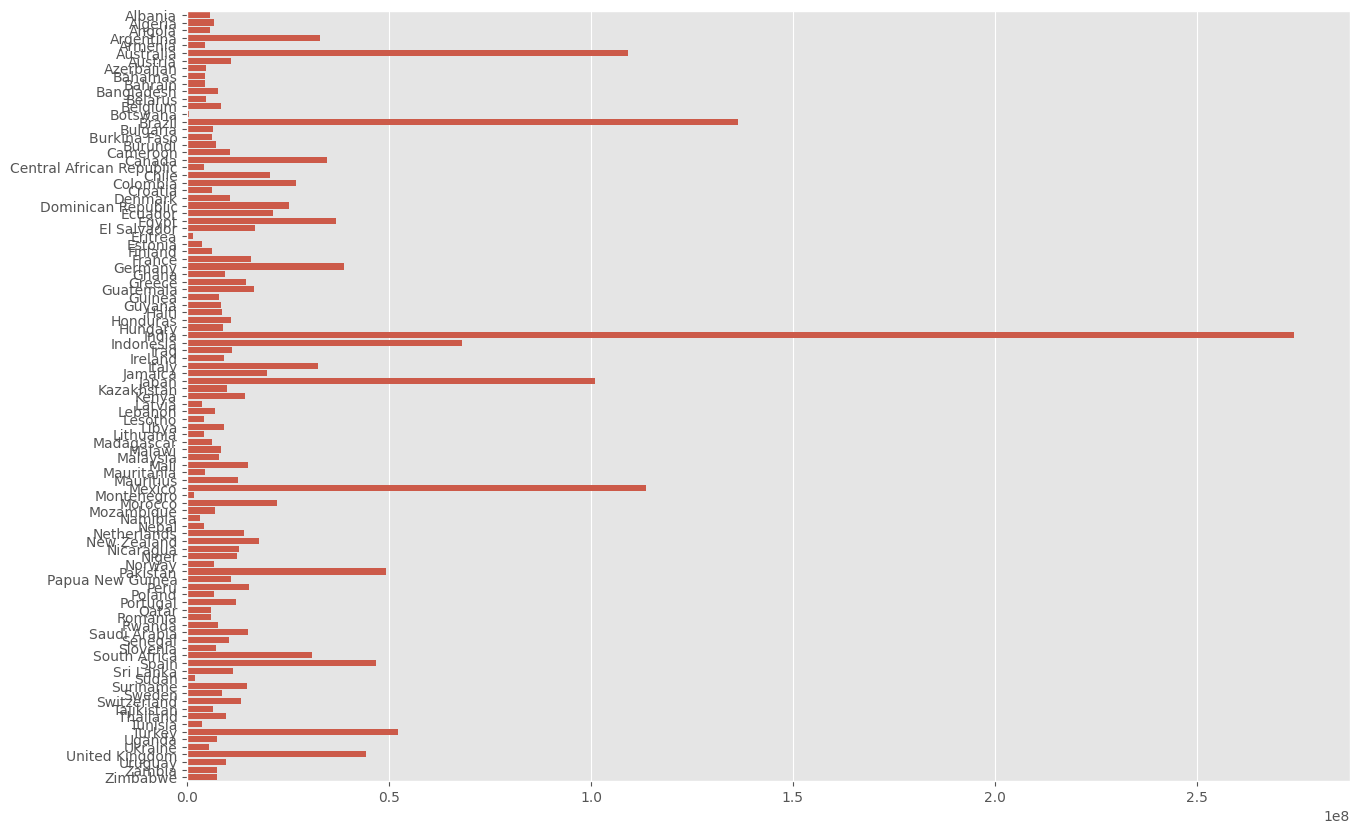

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(y=country, x=yield_per_country)
plt.show()

### Find yield per item

In [26]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())


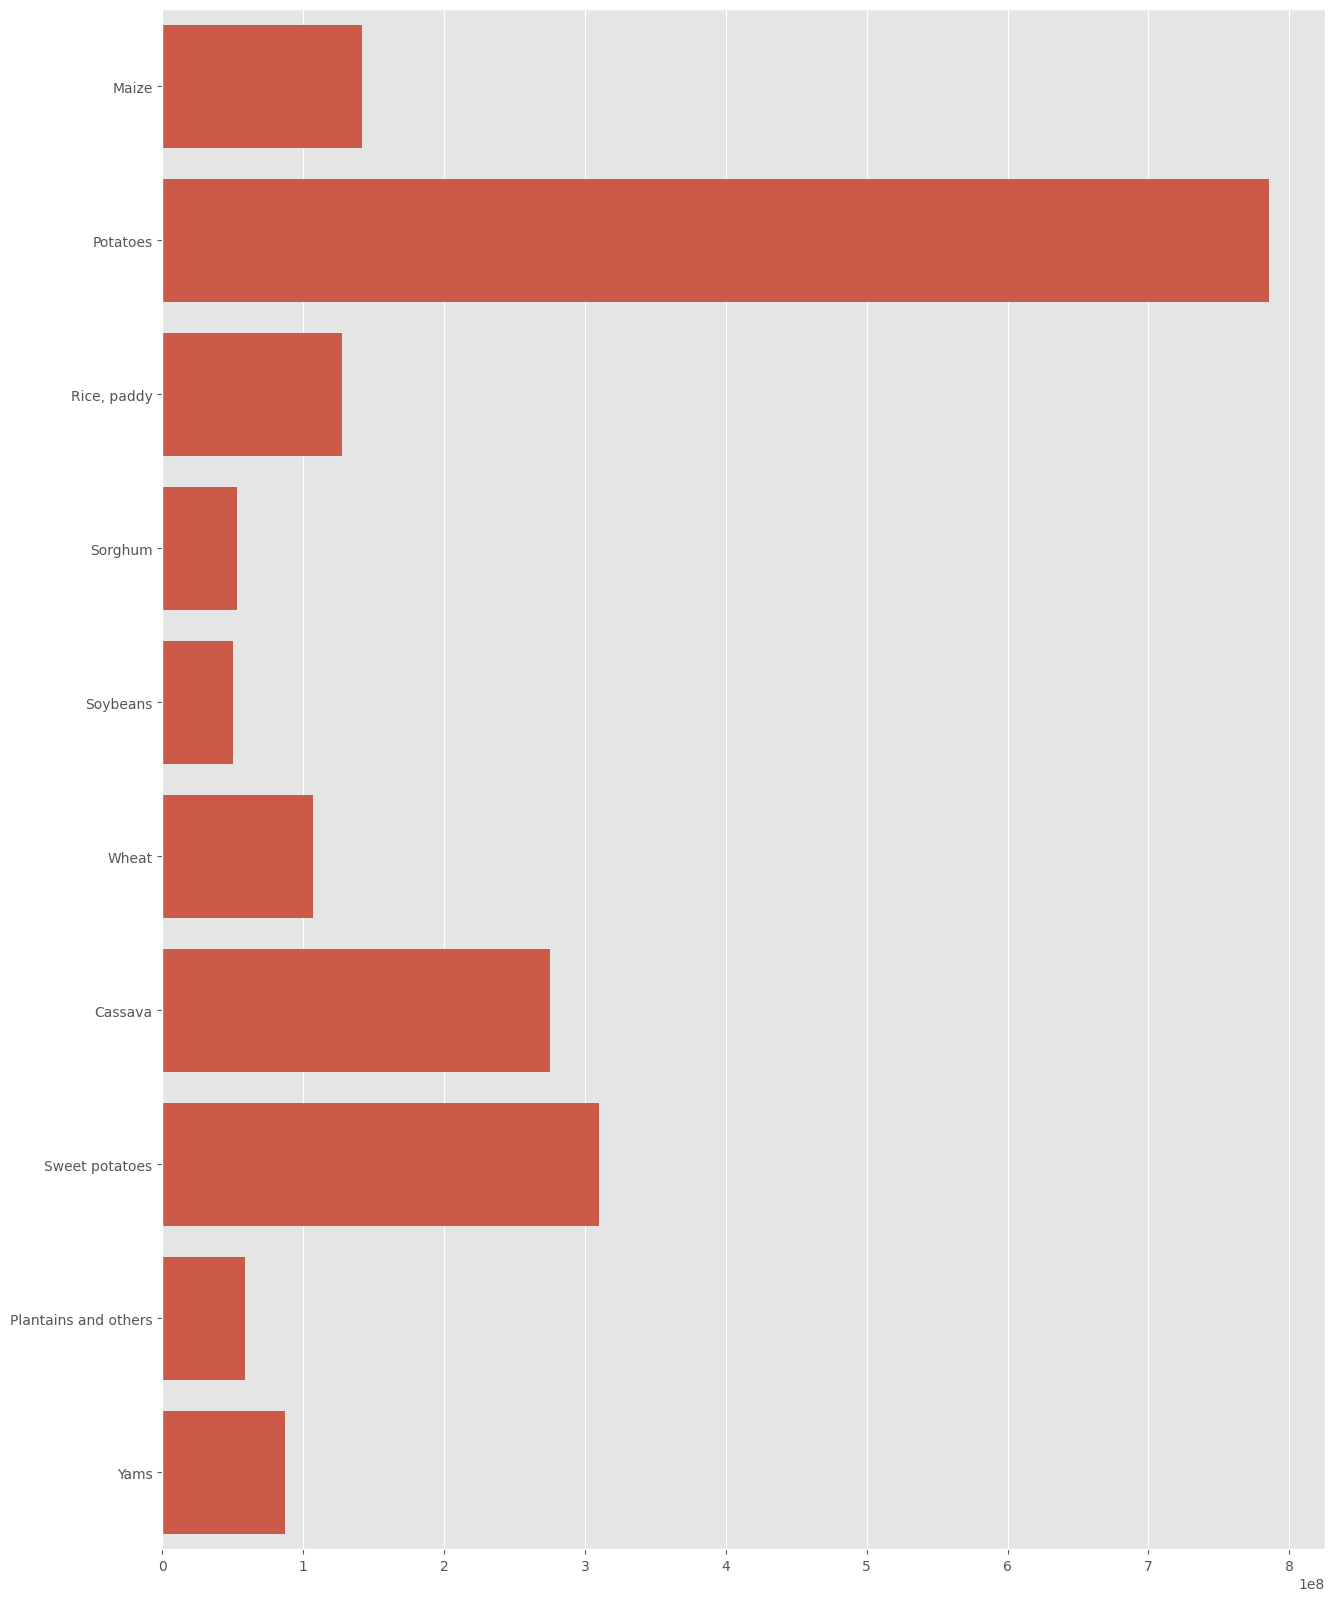

In [27]:
plt.figure(figsize=(15,20))
sns.barplot(y = crops, x = yield_per_crop)
plt.show()

In [28]:
#check for categorical data
df.head()
# Area and Item are categorical here

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [29]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [30]:
# move categorical column to end of features list and target to the end of the array
col = ['Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp','Area', 'Item','hg/ha_yield']

df = df[col]
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


### Divide into dependant and independent features

In [31]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [32]:
X.shape

(25932, 6)

In [33]:
y.shape

(25932,)

### Split test data and training data

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

### Normalization
Scaling numberical features to a common range

In [37]:
### OneHotEncoder will convert categorical text labels to numerical columns.
### StandardScaler will scale numeric features so that they have mean 0 and standard deviation 1.
### ColumnTransformer allows applying different transformations to selected columns.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocessor = ColumnTransformer(transformers = [
    ('StandardScale',scale, [0,1,2,3]),
    ('OneHotEncode',ohe, [4,5])
    ],
    remainder='passthrough')


In [39]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.fit_transform(X_test)

In [40]:
preprocessor.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OneHotEncode__Area_Algeria', 'OneHotEncode__Area_Angola',
       'OneHotEncode__Area_Argentina', 'OneHotEncode__Area_Armenia',
       'OneHotEncode__Area_Australia', 'OneHotEncode__Area_Austria',
       'OneHotEncode__Area_Azerbaijan', 'OneHotEncode__Area_Bahamas',
       'OneHotEncode__Area_Bahrain', 'OneHotEncode__Area_Bangladesh',
       'OneHotEncode__Area_Belarus', 'OneHotEncode__Area_Belgium',
       'OneHotEncode__Area_Botswana', 'OneHotEncode__Area_Brazil',
       'OneHotEncode__Area_Bulgaria', 'OneHotEncode__Area_Burkina Faso',
       'OneHotEncode__Area_Burundi', 'OneHotEncode__Area_Cameroon',
       'OneHotEncode__Area_Canada',
       'OneHotEncode__Area_Central African Republic',
       'OneHotEncode__Area_Chile', 'OneHotEncode__Area_Colombia',
       'OneHotEncode__Area_Croatia', 'OneHotEncode__Area_Denmark',
   

# Train the Model

In [43]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor()
}

for name, md in models.items():
  md.fit(X_train_dummy,y_train)
  y_pred = md.predict(X_test_dummy)
  print(f"{name}: mae : {mean_absolute_error(y_test, y_pred)} score : {r2_score(y_test, y_pred)}")

Linear Regression: mae : 29897.28805252291 score : 0.7472732661395576


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso: mae : 29883.830652070385 score : 0.7472938374682895
Ridge: mae : 29852.960374434308 score : 0.747262666435168
Decision Tree: mae : 5538.8384422594945 score : 0.9687286403427656
KNN: mae : 4679.181530749952 score : 0.9846297814151388


## Model selection
### From above scores KNN has less error and high score. But Decision tree is also closer. Perform cross validation

In [60]:
from sklearn.model_selection import cross_val_score

for name, md in models.items():
    scores = cross_val_score(md, X_train_dummy, y_train, cv=5, scoring='r2')
    print(name, " : ", scores.mean())

Linear Regression  :  0.7487574959886457


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79181665108.27734, tolerance: 11860167124.142298
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899714802401.0352, tolerance: 11965623646.077934
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96906639080.60938, tolerance: 11786364343.248043
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso  :  0.7487583553143059
Ridge  :  0.7487740777720842
Decision Tree  :  0.9738531156373289
KNN  :  0.9796826749614758


Decision tree can be picked up. Though KNN has high accuracy the difference is minimal and DT predicted well with test data. Hence going ahead with DTR.

In [54]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 11488., 34879., 77391.])

# Predictive System

In [55]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocessor.transform(features)
    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [56]:
result = prediction(1990,1485.0,121.0,16.37,'Albania','Maize')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [57]:
result

np.float64(36613.0)

In [51]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [59]:
import pickle
pickle.dump(dtr, open("knn.pkl","wb"))
pickle.dump(preprocessor, open("preprocessor.pkl","wb"))